In [4]:
import requests
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import sys
import os

In [5]:
current_dir = os.path.dirname(os.path.abspath('examples'))
sys.path.append(os.path.join(current_dir, 'robotiq'))
from utils.UR_Functions import URfunctions as URControl
from robotiq.robotiq_gripper import RobotiqGripper

In [20]:
resp = requests.get("http://"+"192.168.0.2"+":4242/current.jpg?type=color").content
image_array = np.frombuffer(resp, np.uint8)
image = cv.imdecode(image_array, cv.IMREAD_GRAYSCALE)


In [21]:
img = cv.medianBlur(image,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

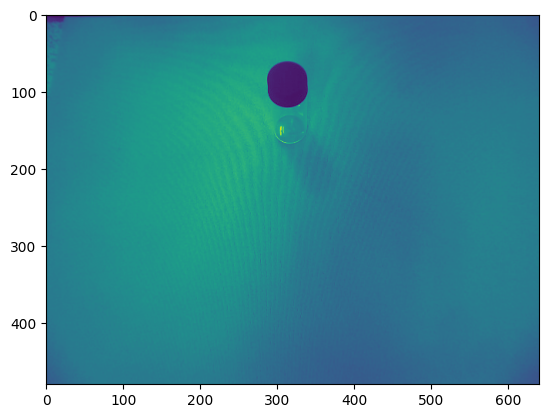

In [22]:
plt.subplot(1, 1, 1)
plt.imshow(image)
plt.show()

In [23]:
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
 
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
 


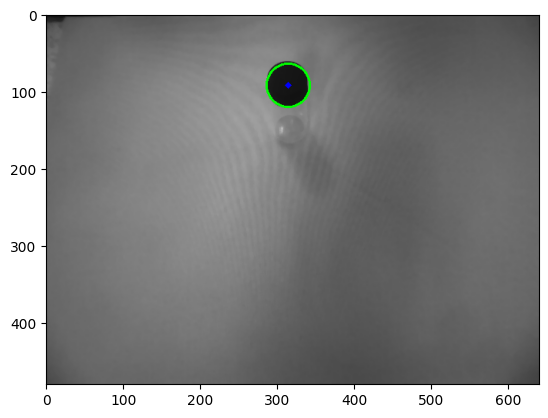

In [24]:
plt.subplot(1, 1, 1)
plt.imshow(cimg)
plt.show()

In [8]:
toolpos=([-247.66,-1075.77,330.89,0.024,3.153,-0.255])
toolposjoint=([1.5387311,  -1.75010457,  1.96276218, -1.94476189, -1.58376438, -0.0147155 ])


In [7]:
robot = URControl(ip="192.168.0.2", port=30003)
#gripper=RobotiqGripper()
#gripper.connect("192.168.0.2", 63352)
#gripper.move(255,125,125)
#robot_position = convert_to_robot_frame(tvec, R)
#robot_orientation = calculate_orientation(R)

Connected to robot


In [8]:
joint_state = ([1.53858709,-1.6697823,   2.13969785, -2.20202078, -1.58471042, -0.0138014])
robot.move_joint_list(joint_state, 0.25, 0.5, 0.02) 

In [1]:
robot.close_connection()

NameError: name 'robot' is not defined